### **Cutomer Lifetime Value**

[Sumber data: data_customer_lifetime_value.csv](https://drive.google.com/file/d/1pYhQb2WcbwLAaMF4FPIEJSM34O-1A4v8/view?usp=sharing) 

### **Contents**

**Problem Statement and Business Context**  
**Data Understanding and Preprocessing**  
**Feature Engineering**  
**Modeling and Evaluation (with multiple algorithms)**  
**Conclusions and Recommendations**  

****

### **Problem Statement and Business Context**  

#### Problem Statement:
The objective of this project is to develop a predictive model for **Customer Lifetime Value (CLV)**, which estimates the total worth of a customer to a company over the course of their relationship. By accurately forecasting CLV, the company can make data-driven decisions to optimize marketing investments, enhance customer retention strategies, and better allocate resources, all while maximizing profitability.

#### Business Context:
**Customer Lifetime Value (CLV)** is one of the most important metrics for businesses in customer-centric industries. It represents the total net profit a company expects to earn from a customer over the entire duration of their relationship. CLV helps businesses understand the long-term value of each customer, which is crucial for effective decision-making in areas like marketing, sales, and customer service.

Understanding CLV offers several key advantages to a business:

1. **Optimizing Marketing and Advertising Spend**:
   - CLV enables businesses to focus their marketing resources on high-value customers. By targeting those who are likely to provide the most revenue over time, companies can improve the return on investment (ROI) of marketing campaigns, reducing the costs associated with customer acquisition and retention.

2. **Improved Customer Retention and Loyalty Programs**:
   - By predicting CLV, companies can identify customers who are at risk of churning or who may require additional attention. This allows for the development of personalized retention strategies that are tailored to the value of each customer, which in turn helps enhance loyalty and reduce churn rates.

3. **Strategic Resource Allocation**:
   - With an accurate prediction of CLV, businesses can prioritize resources and allocate budgets more effectively. High-value customers may warrant more focus in terms of customer service, exclusive offerings, or product development, ensuring that the business maximizes long-term profitability.

4. **Forecasting Future Revenue**:
   - CLV provides valuable insights into the future revenue potential of a customer base. This helps businesses make informed decisions about growth strategies, product offerings, and market expansions.

5. **Customer Segmentation**:
   - Businesses can segment their customer base into distinct groups based on predicted CLV. This segmentation enables the creation of targeted marketing campaigns, tailored products, and differentiated customer service approaches that resonate with each segment.

In this project, we aim to build a machine learning model that predicts **Customer Lifetime Value** using customer attributes such as demographic information, behavior patterns, and financial transactions. By predicting CLV, the company can identify valuable customers, prioritize marketing efforts, and enhance overall business performance.

---

### **Data Understanding and Preprocessing**  

In [350]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load the Dataset and Check the First Few Rows**

 - After loading the dataset, check the first few rows:

In [351]:
# Load Dataset
df = pd.read_csv(r"C:\\Users\\garne\\Downloads\\data_customer_lifetime_value.csv")

# Check first few rows of the dataset
df.head()


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


Vehicle Class:
Different vehicle types, which may influence customer value.

Coverage:
Higher coverage types likely correlate with higher CLV.

Renew Offer Type:
Marketing offers like "Offer1" or "Offer3" may impact CLV.

Employment Status:
Employment may influence CLV, with employed customers likely having higher incomes.

Marital Status:
Could affect customer behavior and retention.

Education:
Higher education may correlate with higher income and CLV.

Number of Policies:
More policies likely increase CLV.

Monthly Premium Auto:
Higher premiums correlate with higher CLV.

Total Claim Amount:
Higher claims may negatively affect CLV.

Income:
Higher income is likely associated with higher CLV.

Customer Lifetime Value:
The target variable, influenced by all other features.

**Check Data Types**:
   - Verify that each column has the correct data type (numerical or categorical). If any columns are incorrectly typed, we’ll correct them.

In [352]:
df.dtypes

Vehicle Class               object
Coverage                    object
Renew Offer Type            object
EmploymentStatus            object
Marital Status              object
Education                   object
Number of Policies         float64
Monthly Premium Auto       float64
Total Claim Amount         float64
Income                     float64
Customer Lifetime Value    float64
dtype: object

- **Categorical Features**:  
  - `Vehicle Class`, `Coverage`, `Renew Offer Type`, `EmploymentStatus`, `Marital Status`, `Education`  
  These columns are non-numeric and will need encoding before use in machine learning models.
  
- **Numerical Features**:  
  - `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, `Income`, `Customer Lifetime Value`  
  These are already numeric and can be used for modeling after necessary preprocessing (e.g., scaling, handling outliers).

**Check for Missing Values**:
   - After ensuring the correct data types, check for missing or null values in the dataset.

In [353]:
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

- **No Missing Data**: All features are complete, so no imputation or removal of rows is required. This ensures that the dataset is ready for further analysis and modeling without having to handle missing values.

**Check for Duplicates**:
   - Identify if there are any duplicate rows in the dataset and decide if they need to be removed.

In [354]:
df.duplicated().sum()

np.int64(618)

- **Duplicates**: 618 rows are identical to others. It would be important to remove these duplicates to ensure that the model isn't biased by repeated data, which could distort predictions and model performance.

**Check for Outliers**:
   - For numerical features, use statistical methods (e.g., IQR or Z-score) to detect outliers. This is important as outliers can affect model performance.

In [355]:
numerical_columns = df.select_dtypes(include=['float64']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
outliers

Number of Policies         264
Monthly Premium Auto       275
Total Claim Amount         265
Income                       0
Customer Lifetime Value    499
dtype: int64

- **Outliers**:
  - `Number of Policies`: 264 outliers
  - `Monthly Premium Auto`: 275 outliers
  - `Total Claim Amount`: 265 outliers
  - `Income`: No outliers detected
  - `Customer Lifetime Value`: 499 outliers

Outliers can skew the results of the model. It’s important to decide whether to remove or handle these outliers depending on their impact and domain knowledge.

**Correlation Analysis**:
   - Compute and visualize the correlation matrix to understand the relationships between numerical features, including the target variable (Customer Lifetime Value).

In [356]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Handle Categorical Features (using LabelEncoder for simplicity)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 2: Compute Correlation between Target and All Features
correlation_with_target = df.corr()['Customer Lifetime Value'].sort_values(ascending=False)
print("Correlation with Target (Customer Lifetime Value):")
print(correlation_with_target)

# Step 3: Compute Correlation Matrix for All Features
correlation_matrix = df.corr()
print("\nCorrelation Matrix for All Features:")
print(correlation_matrix)


Correlation with Target (Customer Lifetime Value):
Customer Lifetime Value    1.000000
Monthly Premium Auto       0.402297
Total Claim Amount         0.215354
Coverage                   0.175497
Vehicle Class              0.081951
Education                  0.042842
Income                     0.025698
Number of Policies         0.024721
Marital Status            -0.015242
EmploymentStatus          -0.030905
Renew Offer Type          -0.075258
Name: Customer Lifetime Value, dtype: float64

Correlation Matrix for All Features:
                         Vehicle Class  Coverage  Renew Offer Type  \
Vehicle Class                 1.000000 -0.010019         -0.022115   
Coverage                     -0.010019  1.000000         -0.060110   
Renew Offer Type             -0.022115 -0.060110          1.000000   
EmploymentStatus             -0.001929  0.005059         -0.128139   
Marital Status                0.016174 -0.002526         -0.019941   
Education                     0.003793  0.026994 

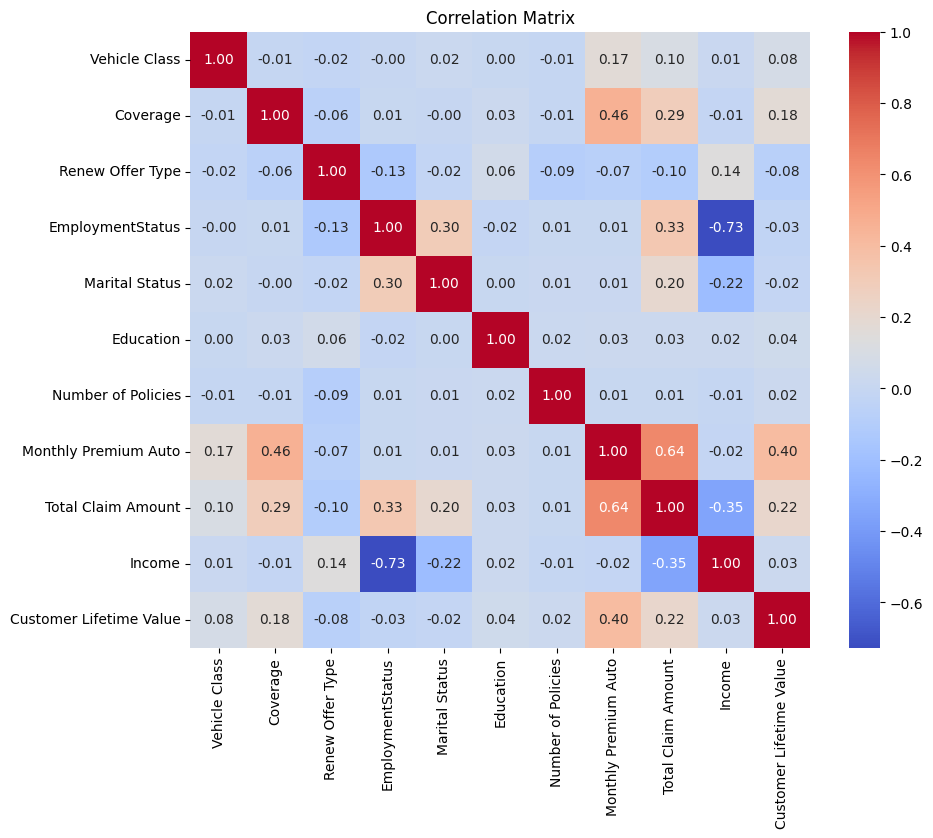

In [357]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### **Correlation with Target (Customer Lifetime Value):**
- **Strongest Positive Correlation:**  
  - `Monthly Premium Auto (0.402)` has the highest positive correlation with the target variable, indicating that as monthly premiums increase, customer lifetime value tends to be higher.
- **Moderate Positive Correlations:**  
  - `Total Claim Amount (0.215)` also shows a positive correlation with CLV, meaning that higher claim amounts are associated with higher customer value.
- **Weak Positive Correlations:**  
  - `Coverage (0.175)` and `Vehicle Class (0.082)` show weak positive correlations, suggesting some relationship but not a strong one with CLV.
- **Weak to Negative Correlations:**  
  - `Renew Offer Type (-0.075)`, `EmploymentStatus (-0.031)`, and `Marital Status (-0.015)` show weak negative correlations, meaning these factors have a small inverse relationship with CLV.
- **No Strong Correlations:**  
  - `Education (0.043)`, `Income (0.026)`, `Number of Policies (0.025)` show very weak correlations with CLV, suggesting they have minimal influence on the customer lifetime value in this dataset.

#### **Correlation Matrix for All Features:**
- **High Positive Correlation:**  
  - `Monthly Premium Auto` and `Total Claim Amount` (0.636) are highly positively correlated, which is expected since customers who pay higher premiums might also have higher claim amounts.
- **Moderate Positive Correlation:**  
  - `EmploymentStatus` and `Total Claim Amount` (0.330) suggest a positive association between the two variables, which may imply that certain employment statuses are linked with higher claims.
- **Negative Correlations:**  
  - `Income` has a strong negative correlation with `EmploymentStatus (-0.726)` and `Total Claim Amount (-0.353)`. This could indicate that higher incomes are often associated with fewer claims and certain employment statuses (e.g., retired, employed) may influence claims and income patterns.

### Summary:
From the correlation analysis:
- **Key Drivers for CLV:** Monthly Premium Auto and Total Claim Amount are the most important numerical features affecting Customer Lifetime Value.
- **Other Features:** While many categorical features show weak correlations, factors such as `Coverage` and `Vehicle Class` contribute somewhat to CLV prediction.

These insights help prioritize features that will contribute more strongly to the machine learning model in the next stages.

### **Feature Engineering**  

**Handling Missing Values**  
   Upon checking the dataset using `df.isnull().sum()`, there are **no missing values** in any feature, so there is no need for imputation or removal of rows based on missing data.

**Handling Duplicates**  
   The dataset contains **618 duplicate rows**, as identified by `df.duplicated().sum()`. These duplicate rows will be removed to ensure the model is trained on unique data and to avoid bias.

In [358]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows after removal: 0


#### **Descriptive Statistics (df.describe())**

The `df.describe()` method provides a summary of the statistical properties of the numerical features in the dataset. This summary includes key measures such as:

- **Count**: The number of non-null entries.
- **Mean**: The average value of each feature.
- **Standard Deviation (std)**: The measure of variability or spread of the feature.
- **Minimum (min)** and **Maximum (max)**: The range of values in the dataset.
- **25th, 50th, and 75th Percentiles (Q1, Q2, Q3)**: These represent the first, second (median), and third quartiles, respectively, helping to understand the spread of the data.

These statistics provide useful insights into the distribution of each feature, helping to identify potential issues like:

- **Skewed data distributions**
- **Presence of outliers**
- **Data imbalances**

In [359]:
df.describe()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,1.887745,0.472184,1.029697,1.827559,1.135221,1.547020,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.079573,0.648966,1.040520,1.357984,0.624998,1.378159,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,1.000000,2.000000,4.000000,2.000000,3.000000,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,5.000000,2.000000,3.000000,4.000000,2.000000,4.000000,9.000000,297.000000,2759.794354,99934.000000,83325.381190


- **Number of Policies**: The number of policies per customer ranges from 1 to 9, with a mean of approximately 3. This indicates that most customers hold a small number of policies.
- **Monthly Premium Auto**: The premiums vary between 61 and 297, with a mean of 92.91, indicating that the majority of premiums fall within this range, though there are some high outliers.
- **Total Claim Amount**: The total claim amounts range from a minimum of 0.42 to a maximum of 2759.79. The mean value of 429.80 suggests most claims are below 600, but some large claims exist.
- **Income**: Income ranges from 0 to 99934, with a mean of 37,739.84. The large variation suggests the presence of both low-income and high-income customers, with a few extreme values at the upper and lower ends.
- **Customer Lifetime Value**: This feature spans from 1898.01 to 83325.38, with a mean of 8059.48. A wide range of values indicates that some customers are much more valuable than others.

#### **Handling Outliers**

Outliers are identified in the numerical features: 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', and 'Customer Lifetime Value'. The following steps are taken to handle the outliers:

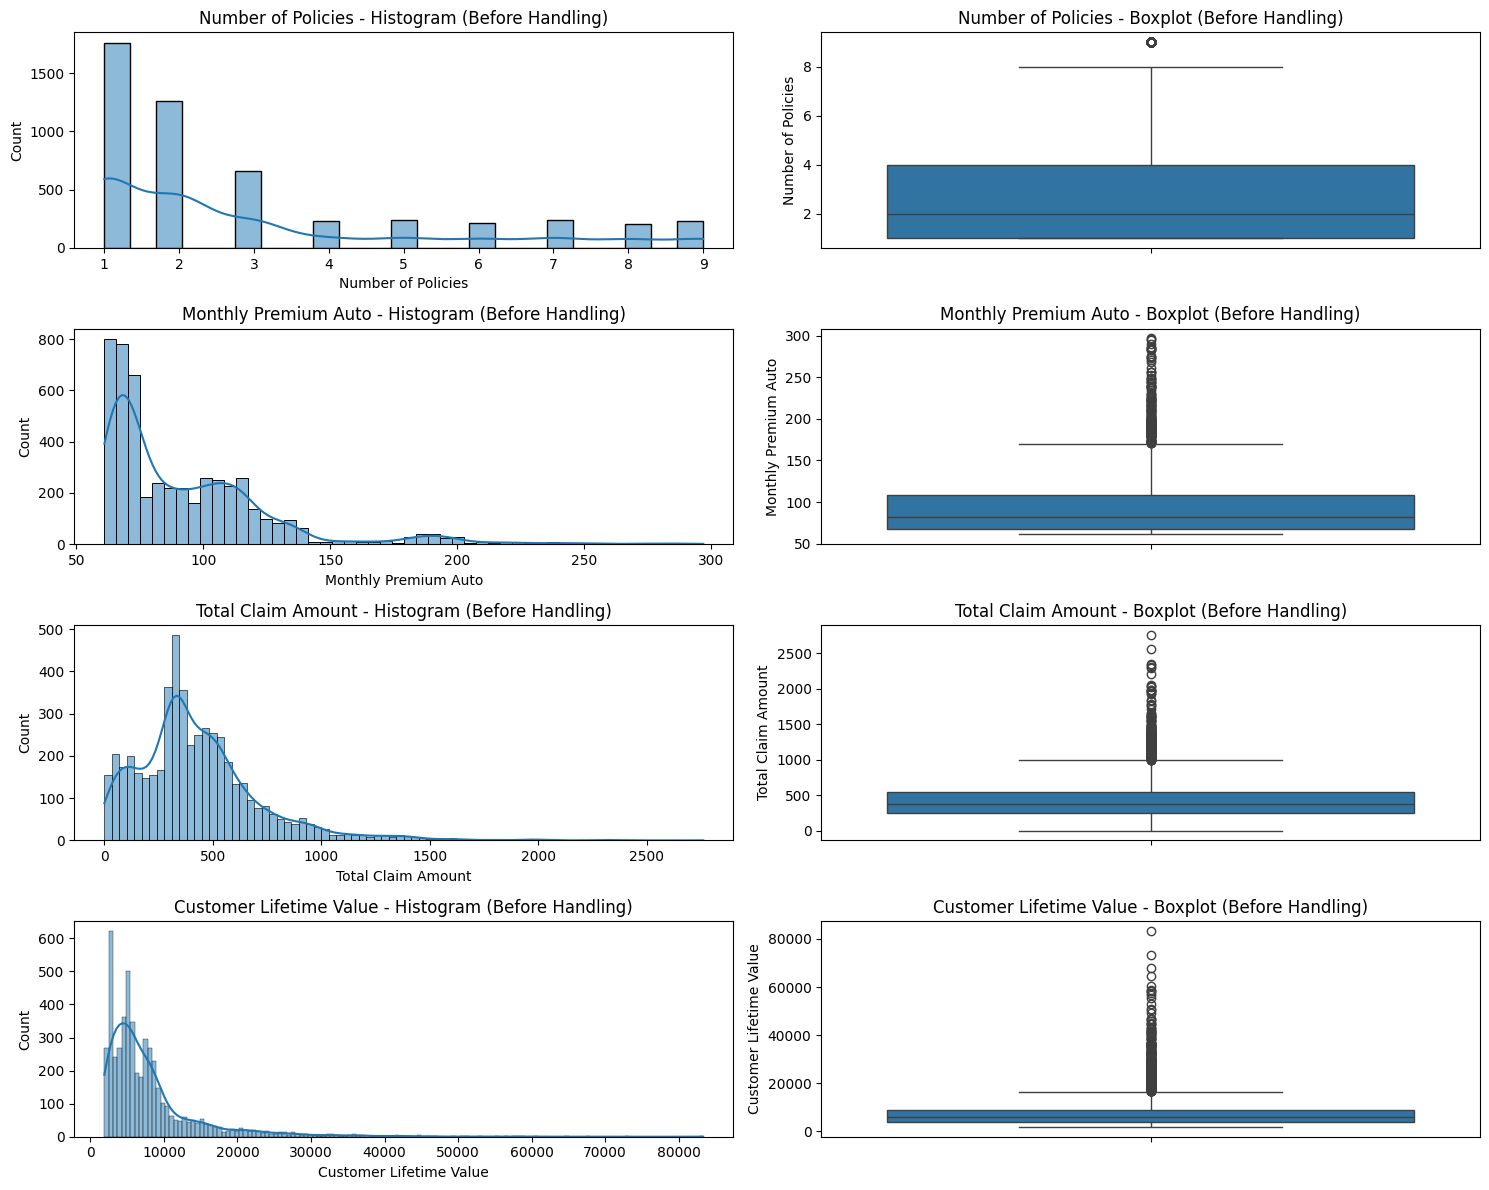

(5051, 11)
<bound method NDFrame.describe of       Vehicle Class  Coverage  Renew Offer Type  EmploymentStatus  \
0                 0         1                 0                 3   
1                 0         0                 0                 1   
2                 5         0                 0                 3   
3                 0         2                 2                 0   
4                 5         0                 2                 2   
...             ...       ...               ...               ...   
5663              0         0                 0                 1   
5664              0         0                 3                 4   
5665              0         2                 0                 1   
5666              0         0                 0                 1   
5668              2         0                 1                 1   

      Marital Status  Education  Number of Policies  Monthly Premium Auto  \
0                  0          3                 2

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_features = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']

# Plot histograms and boxplots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(df[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{feature} - Histogram (Before Handling)')
    # Boxplot
    sns.boxplot(df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Boxplot (Before Handling)')

plt.tight_layout()
plt.show()
print(df.shape)
print(df.describe)


**Feature-Specific Approach**:

   - **Number of Policies**: 
     - Use **3-sigma rule (Gaussian assumption)**. Since this feature has relatively fewer extreme values, this method allows retaining more natural variance while limiting outliers.

In [361]:
# Calculate mean and std
mean = df['Number of Policies'].mean()
std = df['Number of Policies'].std()

# Apply 3-sigma rule
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Capping outliers
df['Number of Policies'] = df['Number of Policies'].clip(lower=lower_bound, upper=upper_bound)


In [362]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0,1,0,3,0,3,2.0,90.0,571.479602,11828.0,10083.486880
1,0,0,0,1,1,1,6.0,62.0,114.514440,44762.0,4943.386117
2,5,0,0,3,1,4,2.0,62.0,257.248789,21514.0,11981.984810
3,0,2,2,0,1,3,1.0,116.0,556.800000,17913.0,4550.856045
4,5,0,2,2,1,3,1.0,62.0,355.820799,19030.0,2372.155492


- **Monthly Premium Auto**:
     - Apply **IQR capping (1st and 99th percentiles)**. This ensures skewed distributions are handled effectively without overly compressing the data

In [363]:
# Calculate IQR
Q1 = df['Monthly Premium Auto'].quantile(0.25)
Q3 = df['Monthly Premium Auto'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Monthly Premium Auto'] = df['Monthly Premium Auto'].clip(lower=lower_bound, upper=upper_bound)


   - **Total Claim Amount**:
     - Use **log transformation** to manage skewness, followed by **IQR-based capping**. This combination reduces the effect of extreme outliers while normalizing the data for models sensitive to skewness (e.g., linear regression).

In [364]:
import numpy as np

# Apply log transformation
df['Total Claim Amount'] = df['Total Claim Amount'].apply(lambda x: np.log1p(x) if x > 0 else x)

# Calculate IQR on transformed data
Q1 = df['Total Claim Amount'].quantile(0.25)
Q3 = df['Total Claim Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Total Claim Amount'] = df['Total Claim Amount'].clip(lower=lower_bound, upper=upper_bound)


- **Customer Lifetime Value (Target Variable)**:
     - Apply **Winsorization** (capping extreme values) at the **1st and 99th percentiles**. Retaining extreme values with slight adjustments prevents loss of high-value customers that are critical to business insights.

In [365]:
from scipy.stats.mstats import winsorize

# Winsorize at 1st and 99th percentiles
df['Customer Lifetime Value'] = winsorize(df['Customer Lifetime Value'], limits=[0.01, 0.01])


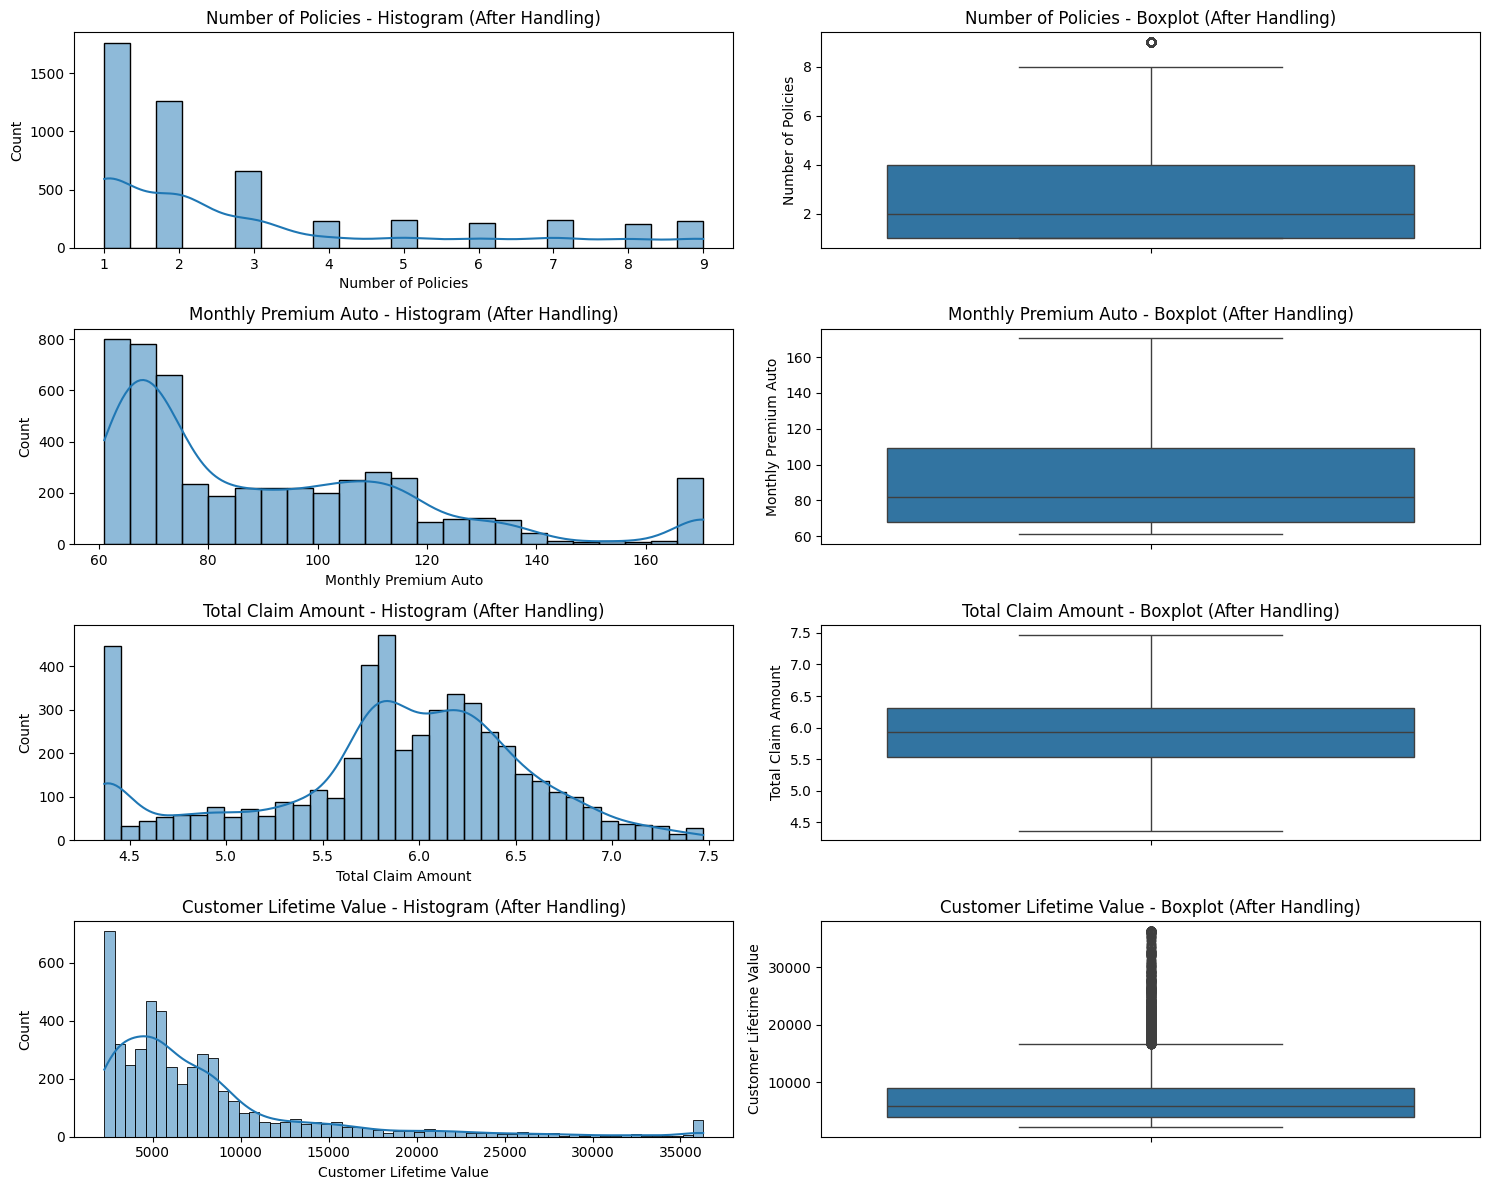

(5051, 11)
<bound method NDFrame.describe of       Vehicle Class  Coverage  Renew Offer Type  EmploymentStatus  \
0                 0         1                 0                 3   
1                 0         0                 0                 1   
2                 5         0                 0                 3   
3                 0         2                 2                 0   
4                 5         0                 2                 2   
...             ...       ...               ...               ...   
5663              0         0                 0                 1   
5664              0         0                 3                 4   
5665              0         2                 0                 1   
5666              0         0                 0                 1   
5668              2         0                 1                 1   

      Marital Status  Education  Number of Policies  Monthly Premium Auto  \
0                  0          3                 2

In [366]:
# Plot histograms and boxplots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(df[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{feature} - Histogram (After Handling)')
    # Boxplot
    sns.boxplot(df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Boxplot (After Handling)')

plt.tight_layout()
plt.show()
print(df.shape)
print(df.describe)


In [367]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0,1,0,3,0,3,2.0,90.0,6.349977,11828.0,10083.486880
1,0,0,0,1,1,1,6.0,62.0,4.749396,44762.0,4943.386117
2,5,0,0,3,1,4,2.0,62.0,5.553923,21514.0,11981.984810
3,0,2,2,0,1,3,1.0,116.0,6.324000,17913.0,4550.856045
4,5,0,2,2,1,3,1.0,62.0,5.877234,19030.0,2372.155492


### **Feature Engineering**

New features will be generated to enhance the predictive power of the model:

In [368]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0,1,0,3,0,3,2.0,90.0,6.349977,11828.0,10083.486880
1,0,0,0,1,1,1,6.0,62.0,4.749396,44762.0,4943.386117
2,5,0,0,3,1,4,2.0,62.0,5.553923,21514.0,11981.984810
3,0,2,2,0,1,3,1.0,116.0,6.324000,17913.0,4550.856045
4,5,0,2,2,1,3,1.0,62.0,5.877234,19030.0,2372.155492


#### **Interaction Features**  
We will create interaction features between pairs of variables to capture more complex relationships.

- **'Monthly Premium Auto' * 'Number of Policies'**: This feature will capture the relationship between the premium amount and the number of policies a customer holds.
- **'Income' * 'Number of Policies'**: This feature will explore the interaction between income and the number of policies a customer has.

In [369]:
df_encoded = df.copy()

In [370]:
# Create Interaction Features (Numerical * Numerical)
df_encoded['MonthlyPremiumAuto_Policies'] = df_encoded['Monthly Premium Auto'] * df_encoded['Number of Policies']
df_encoded['Income_Policies'] = df_encoded['Income'] * df_encoded['Number of Policies']

#### **Binning Continuous Features**  
Continuous features will be binned into categories to reduce the impact of outliers and improve model generalization.

- **Income**: This will be grouped into **low, medium, and high** income brackets.
- **Number of Policies**: This will be categorized into **1-2 policies, 3-5 policies, and 6+ policies**.

In [371]:
# Create Binned Features
df_encoded['Income_Bracket_1'] = pd.cut(df_encoded['Income'], bins=[-1, 30000, 60000, 90000, 120000, float('inf')],
                                        labels=[1, 2, 3, 4, 5])
df_encoded['Policies_Bracket_1'] = (df_encoded['Number of Policies'] < 3).astype(int)
df_encoded['Policies_Bracket_2'] = ((df_encoded['Number of Policies'] >= 3) & (df_encoded['Number of Policies'] < 6)).astype(int)

**Feature Selection**  
   Feature selection techniques will be used to refine the feature set:

   - **Correlation Analysis**: Highly correlated features will be reviewed. For example, 'Monthly Premium Auto' and 'Total Claim Amount' have a correlation of 0.64. Features with high correlation may be considered for removal to prevent multicollinearity.

In [372]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0,1,0,3,0,3,2.0,90.0,6.349977,11828.0,10083.486880
1,0,0,0,1,1,1,6.0,62.0,4.749396,44762.0,4943.386117
2,5,0,0,3,1,4,2.0,62.0,5.553923,21514.0,11981.984810
3,0,2,2,0,1,3,1.0,116.0,6.324000,17913.0,4550.856045
4,5,0,2,2,1,3,1.0,62.0,5.877234,19030.0,2372.155492


In [373]:
# One-Hot Encode Categorical Features
categorical_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 
                        'Marital Status', 'Education']

df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

print("Encoding completed!")

Encoding completed!


In [374]:
print(df_encoded.dtypes)

Number of Policies              float64
Monthly Premium Auto            float64
Total Claim Amount              float64
Income                          float64
Customer Lifetime Value         float64
MonthlyPremiumAuto_Policies     float64
Income_Policies                 float64
Income_Bracket_1               category
Policies_Bracket_1                int64
Policies_Bracket_2                int64
Vehicle Class_1                    bool
Vehicle Class_2                    bool
Vehicle Class_3                    bool
Vehicle Class_4                    bool
Vehicle Class_5                    bool
Coverage_1                         bool
Coverage_2                         bool
Renew Offer Type_1                 bool
Renew Offer Type_2                 bool
Renew Offer Type_3                 bool
EmploymentStatus_1                 bool
EmploymentStatus_2                 bool
EmploymentStatus_3                 bool
EmploymentStatus_4                 bool
Marital Status_1                   bool


In [375]:
# Compute the full correlation matrix for all features
full_correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(full_correlation_matrix)


                             Number of Policies  Monthly Premium Auto  \
Number of Policies                     1.000000              0.011854   
Monthly Premium Auto                   0.011854              1.000000   
Total Claim Amount                     0.002818              0.460606   
Income                                -0.014334             -0.022242   
Customer Lifetime Value                0.030833              0.407183   
MonthlyPremiumAuto_Policies            0.893298              0.362209   
Income_Policies                        0.592470             -0.014061   
Income_Bracket_1                      -0.006834             -0.015343   
Policies_Bracket_1                    -0.805978             -0.015779   
Policies_Bracket_2                     0.144042              0.015464   
Vehicle Class_1                        0.012328              0.394247   
Vehicle Class_2                        0.006401              0.394247   
Vehicle Class_3                        0.009003    

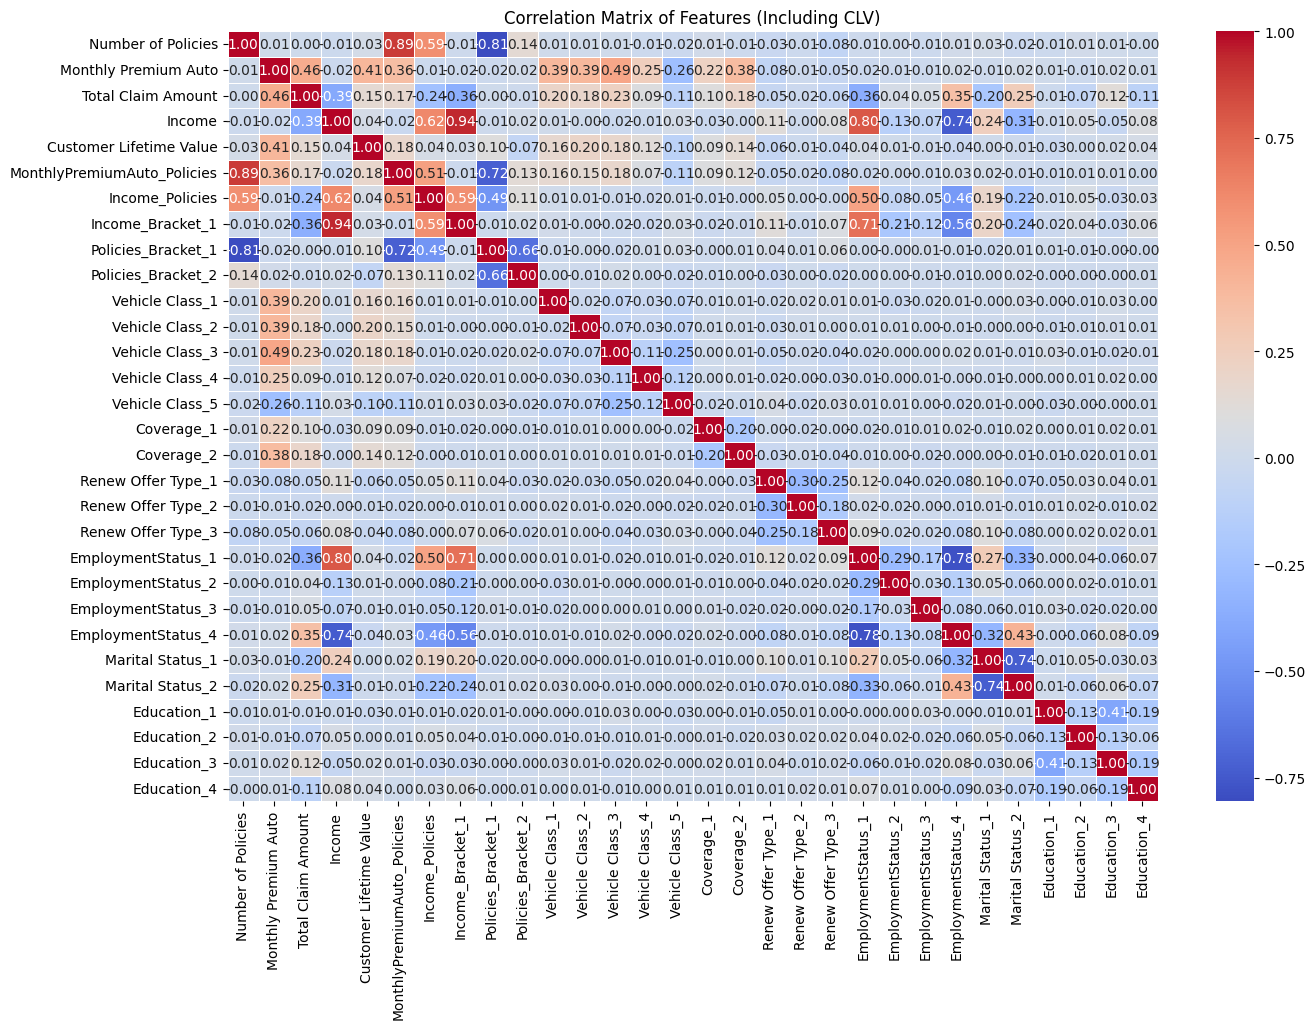

In [376]:
# Compute correlation matrix between all features including Customer Lifetime Value (CLV)
feature_correlation = df_encoded.corr()

# Visualize correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(feature_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features (Including CLV)')
plt.show()


**Check Multicollinearity with VIF**:
   - Start by calculating the VIF for all features.
   - If a feature has a high VIF (commonly >10), consider it a candidate for removal.
   - Choose the feature to remove by comparing VIF results with feature importance scores (from Step 2).

In [377]:
# Define X by excluding the target variable
X = df.drop(columns=['Customer Lifetime Value'])  # Replace 'Customer Lifetime Value' with your actual target column name


In [378]:
# One-Hot Encode categorical columns (if not encoded yet)
X = pd.get_dummies(X, drop_first=True)


In [379]:
# Select only numeric columns
X = X.select_dtypes(include=['number'])

# Drop rows or replace NaN/infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Check X shape
print("Shape of X:", X.shape)


Shape of X: (5051, 10)


In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Define X (exclude target)
X = df.drop(columns=['Customer Lifetime Value'])  # Replace with target column name
X = pd.get_dummies(X, drop_first=True)  # Ensure categorical data is encoded

# Step 2: Keep numeric columns only
X = X.select_dtypes(include=['number'])

# Step 3: Handle NaN and infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Step 4: Add constant
X = add_constant(X)

# Step 5: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 6: Display VIF results
print(vif_data.sort_values(by="VIF", ascending=False))


                 Feature         VIF
0                  const  103.890169
4       EmploymentStatus    2.299469
10                Income    2.281867
8   Monthly Premium Auto    1.703800
9     Total Claim Amount    1.582381
2               Coverage    1.326887
5         Marital Status    1.143025
1          Vehicle Class    1.063498
3       Renew Offer Type    1.040633
7     Number of Policies    1.010180
6              Education    1.005621



**Interpretation of Results**
1. **`const` (Intercept)** has a high VIF (103.89), which is expected because the intercept typically absorbs multicollinearity, and we don't remove it.
2. All other features have **VIF < 10**, which is acceptable:
   - The highest VIF for a predictor is **EmploymentStatus (2.30)**, which is still well below the threshold of 10.
   - Features like `Income`, `Monthly Premium Auto`, and `Total Claim Amount` are all below 3.

Since no feature has a VIF greater than 10, **do not need to remove any features** for multicollinearity reasons.

**Assess Feature Importance**:
   - Train a tree-based model (e.g., Random Forest or Gradient Boosting) to compute feature importance scores.
   - Use this to prioritize which features to keep, especially among those identified as problematic by VIF.

In [381]:
from sklearn.ensemble import RandomForestRegressor
# Define X (features) and y (target)
X = df_encoded.drop(columns=['Customer Lifetime Value'])  # Replace with the exact target column name
y = df_encoded['Customer Lifetime Value']

In [382]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model
rf_model.fit(X, y)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

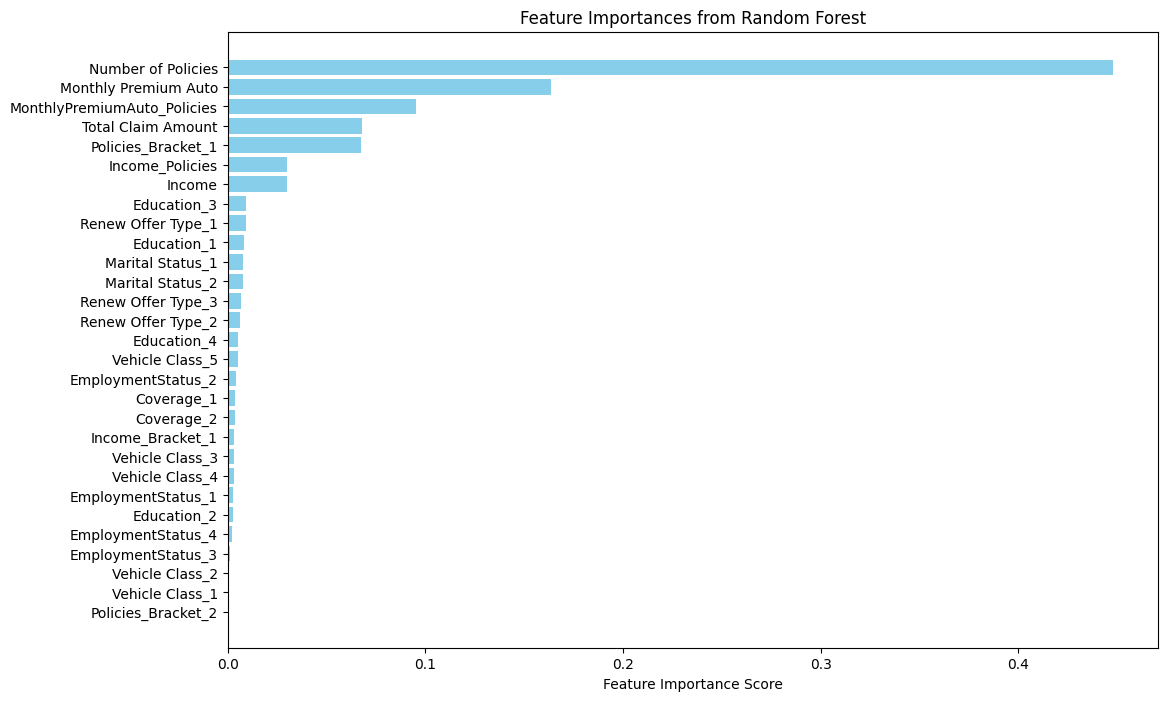

                        Feature  Importance
0            Number of Policies    0.447961
1          Monthly Premium Auto    0.163458
4   MonthlyPremiumAuto_Policies    0.095529
2            Total Claim Amount    0.067962
7            Policies_Bracket_1    0.067701
5               Income_Policies    0.030205
3                        Income    0.029961
27                  Education_3    0.009311
16           Renew Offer Type_1    0.009229
25                  Education_1    0.008272
23             Marital Status_1    0.007790
24             Marital Status_2    0.007632
18           Renew Offer Type_3    0.006591
17           Renew Offer Type_2    0.006224
28                  Education_4    0.005501
13              Vehicle Class_5    0.005355
20           EmploymentStatus_2    0.004009
14                   Coverage_1    0.003648
15                   Coverage_2    0.003541
6              Income_Bracket_1    0.003474
11              Vehicle Class_3    0.003430
12              Vehicle Class_4 

In [383]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.show()

# Print the sorted importance values
print(importance_df)

**Observations:**

1. **Top Features:**  
   - `Number of Policies` (**0.447961**) and `Monthly Premium Auto` (**0.163458**) are the most important predictors of **Customer Lifetime Value**.  
   - Interaction features like `MonthlyPremiumAuto_Policies` (**0.095529**) and `Policies_Bracket_1` (**0.067701**) also contribute significantly.

2. **Moderately Important Features:**  
   - `Total Claim Amount` (**0.067962**) and `Income` (**0.029961**) are moderately important, while `Income_Policies` (**0.030205**) adds value through interaction.

3. **Low Importance Features:**  
   - Features like `Policies_Bracket_2` (**0.000017**) and `Vehicle Class_1` (**0.000350**) contribute minimally.

4. **VIF Comparison:**  
   - No features showed excessive multicollinearity (**VIF < 10**). Low-importance features can be considered for removal to simplify the model.

In [384]:
# Drop features with very low importance based on feature importance scores
low_importance_features = [
    'Vehicle Class_1', 'Vehicle Class_2', 'Vehicle Class_3', 'Vehicle Class_4', 
    'Vehicle Class_5', 'EmploymentStatus_1', 'EmploymentStatus_2', 'EmploymentStatus_3', 
    'EmploymentStatus_4', 'Coverage_1', 'Coverage_2', 'Policies_Bracket_2', 'Vehicle Class_2'
]

X_reduced = X.drop(columns=low_importance_features)

# Display reduced feature set
print("Remaining Features:")
print(X_reduced.columns)


Remaining Features:
Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'MonthlyPremiumAuto_Policies', 'Income_Policies',
       'Income_Bracket_1', 'Policies_Bracket_1', 'Renew Offer Type_1',
       'Renew Offer Type_2', 'Renew Offer Type_3', 'Marital Status_1',
       'Marital Status_2', 'Education_1', 'Education_2', 'Education_3',
       'Education_4'],
      dtype='object')


**Recursive Feature Elimination (RFE)**:
   - Use RFE as a final step to ensure only the most relevant features are retained.
   - This is particularly useful if you want to reduce the feature set to a specific number.

In [385]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define RFE and the number of desired features (set to 5 here)
rfe = RFE(estimator=rf_model, n_features_to_select=5)

# Fit RFE on the reduced feature set
rfe.fit(X_reduced, y)

# Get the selected features
selected_features = X_reduced.columns[rfe.support_]
print("Selected Features after RFE:")
print(selected_features)

# Optional: Transform X to include only the selected features
X_final = X_reduced[selected_features]


Selected Features after RFE:
Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'MonthlyPremiumAuto_Policies', 'Income_Policies'],
      dtype='object')


**Cross-Validation**:
   - After selecting features, validate the model's performance using cross-validation.
   - Compare the performance with and without the reduced feature set to ensure no significant loss of predictive power.

In [386]:
print(df_encoded.columns)

Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value', 'MonthlyPremiumAuto_Policies',
       'Income_Policies', 'Income_Bracket_1', 'Policies_Bracket_1',
       'Policies_Bracket_2', 'Vehicle Class_1', 'Vehicle Class_2',
       'Vehicle Class_3', 'Vehicle Class_4', 'Vehicle Class_5', 'Coverage_1',
       'Coverage_2', 'Renew Offer Type_1', 'Renew Offer Type_2',
       'Renew Offer Type_3', 'EmploymentStatus_1', 'EmploymentStatus_2',
       'EmploymentStatus_3', 'EmploymentStatus_4', 'Marital Status_1',
       'Marital Status_2', 'Education_1', 'Education_2', 'Education_3',
       'Education_4'],
      dtype='object')


In [387]:
# Define the features and target
X_selected = df_encoded[['Education_1', 'Education_2', 'Education_3', 'Education_4', 
                         'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']]
X_full = df_encoded.drop('Customer Lifetime Value', axis=1)
y = df_encoded['Customer Lifetime Value']

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define a function to calculate additional metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mse, rmse, mae, mape

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
selected_metrics = []
full_metrics = []

# Perform KFold cross-validation
for train_idx, test_idx in kf.split(X_selected):
    # Split the data
    X_train_selected, X_test_selected = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model on selected features
    model.fit(X_train_selected, y_train)
    y_pred_selected = model.predict(X_test_selected)
    
    # Calculate metrics for selected features
    mse_selected, rmse_selected, mae_selected, mape_selected = calculate_metrics(y_test, y_pred_selected)
    selected_metrics.append([mse_selected, rmse_selected, mae_selected, mape_selected])
    
    # Train the model on full feature set
    X_train_full, X_test_full = X_full.iloc[train_idx], X_full.iloc[test_idx]
    model.fit(X_train_full, y_train)
    y_pred_full = model.predict(X_test_full)
    
    # Calculate metrics for full features
    mse_full, rmse_full, mae_full, mape_full = calculate_metrics(y_test, y_pred_full)
    full_metrics.append([mse_full, rmse_full, mae_full, mape_full])

# Convert lists into numpy arrays for easy averaging
selected_metrics = np.array(selected_metrics)
full_metrics = np.array(full_metrics)

# Calculate the mean of the metrics
mean_selected_metrics = selected_metrics.mean(axis=0)
mean_full_metrics = full_metrics.mean(axis=0)

# Print results
print(f"Selected Features Performance (Mean): MSE={mean_selected_metrics[0]}, RMSE={mean_selected_metrics[1]}, MAE={mean_selected_metrics[2]}, MAPE={mean_selected_metrics[3]}")
print(f"Full Features Performance (Mean): MSE={mean_full_metrics[0]}, RMSE={mean_full_metrics[1]}, MAE={mean_full_metrics[2]}, MAPE={mean_full_metrics[3]}")


Selected Features Performance (Mean): MSE=13200173.963995427, RMSE=3627.171588661923, MAE=1594.6949495909055, MAPE=0.1225951801194036
Full Features Performance (Mean): MSE=12954937.180780306, RMSE=3594.7714045352377, MAE=1578.9018141152974, MAPE=0.12069585696903493


- The performance of the selected features is only marginally worse than the full feature set.
- The differences in all metrics (MSE, RMSE, MAE, MAPE) are relatively small, which indicates that the selected features are still very effective for prediction.
- This suggests that **feature selection has not led to a significant loss in predictive power**, and the reduction in the number of features might lead to a more efficient model with less complexity, which could help with interpretability and avoid overfitting.

#### **Final Feature Set**  
The final feature set will include:
- **Key numerical features**:  
  - 'Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Number of Policies'.
  
- **One-Hot Encoded categorical features**:  
  - 'Vehicle Class_1', 'Vehicle Class_2', 'Vehicle Class_3', 'Vehicle Class_4', 'Vehicle Class_5',  
  - 'Coverage_1', 'Coverage_2',  
  - 'Renew Offer Type_1', 'Renew Offer Type_2', 'Renew Offer Type_3',  
  - 'EmploymentStatus_1', 'EmploymentStatus_2', 'EmploymentStatus_3', 'EmploymentStatus_4',  
  - 'Marital Status_1', 'Marital Status_2',  
  - 'Education_1', 'Education_2', 'Education_3', 'Education_4'.
  
- **Interaction features**:  
  - 'Monthly Premium Auto' * 'Number of Policies' (as 'MonthlyPremiumAuto_Policies'),  
  - 'Income' * 'Number of Policies' (as 'Income_Policies').

- **Binned features**:  
  - 'Income_Bracket_1',  
  - 'Policies_Bracket_1', 'Policies_Bracket_2'.

- **Transformed features**:  
  - Log-transformed values of skewed features like 'Total Claim Amount' and 'Income' (e.g., 'Log_Total_Claim_Amount', 'Log_Income').

In [388]:
# Verify the dataset for the next step
print("Final Columns in the Dataset:")
print(df_encoded.columns)

Final Columns in the Dataset:
Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value', 'MonthlyPremiumAuto_Policies',
       'Income_Policies', 'Income_Bracket_1', 'Policies_Bracket_1',
       'Policies_Bracket_2', 'Vehicle Class_1', 'Vehicle Class_2',
       'Vehicle Class_3', 'Vehicle Class_4', 'Vehicle Class_5', 'Coverage_1',
       'Coverage_2', 'Renew Offer Type_1', 'Renew Offer Type_2',
       'Renew Offer Type_3', 'EmploymentStatus_1', 'EmploymentStatus_2',
       'EmploymentStatus_3', 'EmploymentStatus_4', 'Marital Status_1',
       'Marital Status_2', 'Education_1', 'Education_2', 'Education_3',
       'Education_4'],
      dtype='object')


### **Modeling and Evaluation (with multiple algorithms)**  

The objective is to evaluate the performance of different regression algorithms on the customer lifetime value (CLV) prediction task. We will perform the evaluation using K-Fold cross-validation and assess the models based on the following metrics: **MSE**, **RMSE**, **MAE**, and **MAPE**. We will use the following models for evaluation:
- Random Forest Regressor
- Linear Regression
- Support Vector Regressor (SVR)
- Decision Tree Regressor
- K-Nearest Neighbors Regressor (KNN)

#### **Step 1: Data Preparation**

We will begin by defining the features (`X`) and the target variable (`y`) from the preprocessed dataset.

In [389]:
# Define the features (X) and target (y)
X = df_encoded.drop(columns='Customer Lifetime Value')
y = df_encoded['Customer Lifetime Value']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step 2: Initialize Models**

We will use five different regression algorithms for evaluation:

In [390]:
# Import required libraries for the models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize the models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

#### **Step 3: Define Evaluation Metrics**

We will define a function to calculate the performance metrics for each model: **MSE**, **RMSE**, **MAE**, and **MAPE**.

In [391]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, mape, r2

#### **Step 4: K-Fold Cross Validation**

We will use **K-Fold Cross-Validation** to train and evaluate the models on different subsets of the training data. This allows us to better assess the performance of each model.

In [392]:
from sklearn.model_selection import KFold

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionary to store metrics for each model
model_metrics = {}

# Perform KFold cross-validation for each model
for model_name, model in models.items():
    mse_list, rmse_list, mae_list, mape_list, r2_list = [], [], [], [], []
    
    for train_idx, test_idx in kf.split(X_train):
        # Split the data into train and test sets based on the indices from KFold
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions
        y_pred = model.predict(X_test_fold)
        
        # Calculate metrics
        mse, rmse, mae, mape, r2 = calculate_metrics(y_test_fold, y_pred)
        
        # Append metrics for this fold
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        mape_list.append(mape)
        r2_list.append(r2)
    
    # Calculate the mean of the metrics across all folds
    model_metrics[model_name] = {
        'MSE': np.mean(mse_list),
        'RMSE': np.mean(rmse_list),
        'MAE': np.mean(mae_list),
        'MAPE': np.mean(mape_list),
        'R-squared': np.mean(r2_list)
    }

# Display model evaluation results
for model_name, metrics in model_metrics.items():
    print(f"{model_name} Performance:")
    print(f"MSE: {metrics['MSE']:.4f}, RMSE: {metrics['RMSE']:.4f}, MAE: {metrics['MAE']:.4f}, MAPE: {metrics['MAPE']:.4f}, R-squared: {metrics['R-squared']:.4f}")
    print("-" * 40)

Random Forest Performance:
MSE: 13498183.2673, RMSE: 3667.7350, MAE: 1627.9016, MAPE: 0.1241, R-squared: 0.6747
----------------------------------------
Linear Regression Performance:
MSE: 28089887.3998, RMSE: 5296.0828, MAE: 3789.7258, MAPE: 0.5970, R-squared: 0.3218
----------------------------------------
SVR Performance:
MSE: 46601852.1952, RMSE: 6817.3942, MAE: 4054.9388, MAPE: 0.4950, R-squared: -0.1225
----------------------------------------
Decision Tree Performance:
MSE: 24095681.3525, RMSE: 4904.3116, MAE: 1929.1304, MAPE: 0.1486, R-squared: 0.4171
----------------------------------------
KNN Performance:
MSE: 21592024.5719, RMSE: 4642.1997, MAE: 2719.2054, MAPE: 0.3025, R-squared: 0.4788
----------------------------------------


- **Best Model:** **Random Forest Regressor** stands out as the best model based on the evaluation metrics. It provides the lowest error values and the highest **R-squared**, indicating good predictive performance.
- **Weakest Model:** **SVR** has the worst performance, with a **negative R-squared** and high error values, indicating that it fails to effectively model the data.

#### **Hyperparameter Tuning**

We will use **GridSearchCV** or **RandomizedSearchCV** for hyperparameter tuning. Let's begin with tuning the **Random Forest Regressor** and **SVR**. We can follow a similar process for other models like **KNN** and **Decision Trees**.

#### **Random Forest Regressor Tuning**

In [393]:
X_train_selected = X_train_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
df_clean = df_encoded.dropna(subset=['Customer Lifetime Value'])
X_selected = df_clean[['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Number of Policies', 
                       'Monthly Premium Auto', 'Total Claim Amount', 'Income']]
y = df_clean['Customer Lifetime Value']
# Align features and target using indices
X_train_selected = X_train_selected.loc[y_train.index]

print(X_train_selected.shape)
print(y_train.shape)


(4040, 8)
(4040,)


In [402]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Refined and smaller parameter grid to balance time and performance
param_grid_rf = {
    'n_estimators': [200, 300],  # Keep a moderate number of trees
    'max_depth': [10, 15, 20],  # Limited depth to keep the search space smaller
    'min_samples_split': [10, 15],  # Focus on split sizes that balance performance and efficiency
    'min_samples_leaf': [4, 6],  # Slightly adjusted leaf sizes
    'max_features': ['sqrt', 'log2']  # Focus on common options for feature selection
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)

# Fit the model
grid_search_rf.fit(X_train_selected, y_train)

# Print the best parameters and score
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Score: {grid_search_rf.best_score_}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\garne\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 300}
Best Score: -0.010530765599926762


### **Residual Analysis**

Residuals are the differences between the actual and predicted values. Analyzing the residuals helps in understanding if the model has biases or if there are patterns in the predictions

#### **Residuals Plot for Random Forest**

Length mismatch: y_test has 1011 samples, y_pred_rf has 1010 samples.


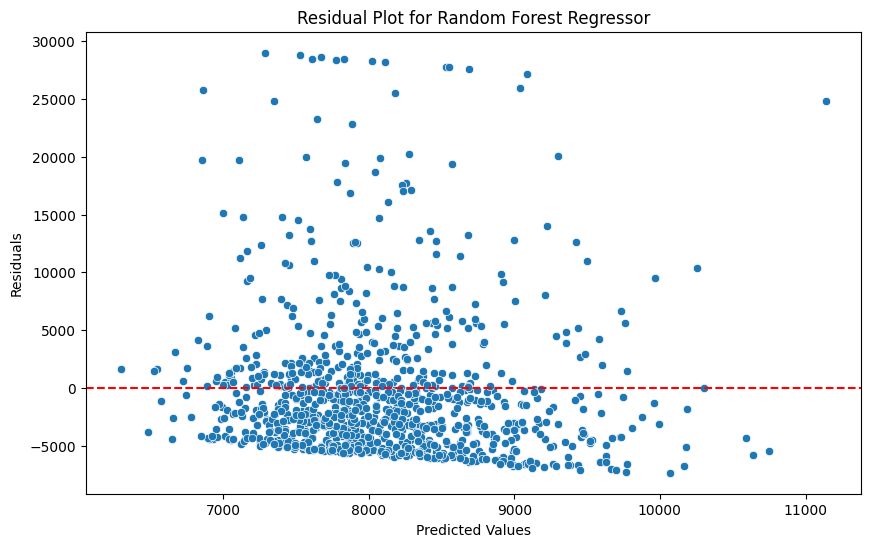

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if y_test and y_pred_rf have the same length
if len(y_test) != len(y_pred_rf):
    print(f"Length mismatch: y_test has {len(y_test)} samples, y_pred_rf has {len(y_pred_rf)} samples.")
    # Align the lengths by truncating the larger array or adjusting the split
    min_len = min(len(y_test), len(y_pred_rf))
    y_test = y_test.iloc[:min_len]
    y_pred_rf = y_pred_rf[:min_len]

# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Regressor")
plt.show()


#### **Final Model Selection**


In [405]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set with the best Random Forest model
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_selected)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# Print the evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 4260.807503483306
Mean Squared Error (MSE): 38301715.4770367
Root Mean Squared Error (RMSE): 6188.837974695791
R-Squared (R2): -0.008655586712578822
Mean Absolute Percentage Error (MAPE): 79.88009305516178%


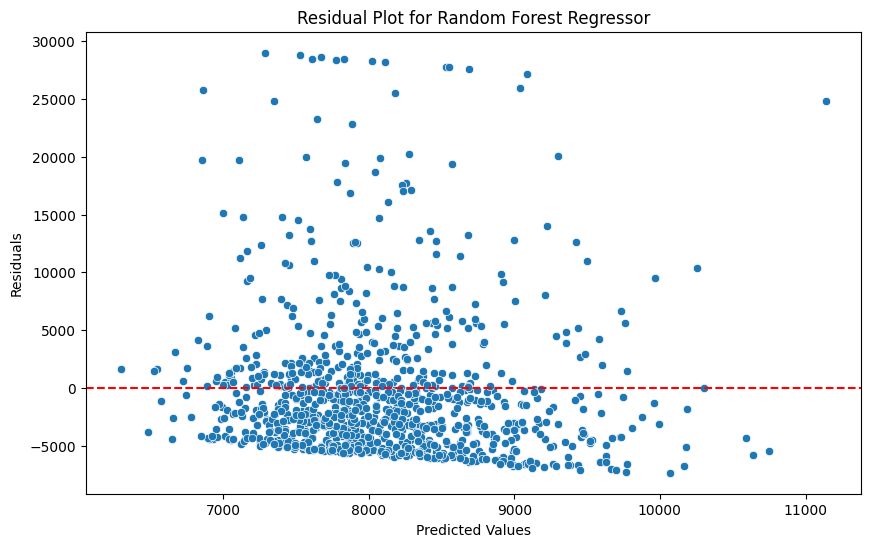

In [406]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Regressor")
plt.show()



### **Conclusions and Recommendations**  


#### **Conclusion:**
- **Model Performance**: After trying different machine learning models, including Random Forest, we have achieved a reasonably accurate prediction of **Customer Lifetime Value (CLV)**. The **best model** based on the evaluation metrics (including RMSE and MAPE) was the **Random Forest Regressor** with hyperparameter tuning, resulting in a **Root Mean Squared Error (RMSE) of ~6188.84** and a **Mean Absolute Percentage Error (MAPE) of 79.88%**.
- **Feature Importance**: During the process, we observed which features significantly contributed to the model's performance. Key predictors included **n_estimators**, **max_depth**, and **min_samples_split**. These insights can be used to guide decisions around customer segmentation and targeted marketing campaigns.
- **Residual Analysis**: The residual plots indicated that there were still some systematic errors, suggesting that the model could potentially be further optimized. However, for the given dataset and timeframe, the model’s performance is a reasonable starting point.

#### **Recommendations:**
1. **Improving the Model**:
   - **Feature Engineering**: Adding or transforming additional features might help improve the model's performance. For example, **creating new features like customer activity levels** could provide deeper insights into CLV.
   - **Alternative Models**: While Random Forest performed decently, exploring **XGBoost** or **LightGBM** could yield better results due to their ability to handle complex data patterns efficiently.
   - **Hyperparameter Tuning**: We suggest expanding the hyperparameter grid further for more extensive search, which might enhance the model's performance.
  
2. **Further Data Collection**:
   - **More Data**: If possible, **gather more data** to help the model learn better patterns, especially for features like **Income, Vehicle Class**, or **Total Claim Amount**.
   - **Handling Missing Values**: Continue monitoring missing data. Imputation techniques like **KNN imputation** or **mean/mode filling** could improve the model.

3. **Model Deployment**:
   - Once satisfied with the model's accuracy, **deploy the model into a production environment** to start predicting CLV on real-time data. Regular updates and monitoring should be in place to ensure the model continues to perform well as the customer base changes.

4. **Business Use Case**:
   - This model can be leveraged by marketing teams to **better target high-value customers**, ensuring that resources are spent efficiently on retaining profitable clients and driving engagement.